In [1]:
#load libraries
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
#import data
data=pd.read_csv('D:\\ExcelR\\Assignments\\Downloaded\\Random Forests\\Fraud_Check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

# the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(60, 6)
       Taxable.Income  City.Population  Work.Experience
count       60.000000        60.000000        60.000000
mean     56500.516667    104336.416667        14.000000
std      23436.263215     50970.870610         9.187316
min      10455.000000     25779.000000         0.000000
25%      38929.000000     66606.000000         5.000000
50%      56545.500000    100268.500000        12.000000
75%      72048.250000    148858.500000        22.000000
max      99325.000000    198571.000000        30.000000


In [4]:
data.loc[data["Taxable.Income"]>=30000,"Income"]="Good"
data.loc[data["Taxable.Income"]<=30000,"Income"]="Risky"

In [5]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
547,YES,Single,92819,42690,25,YES,Good
522,NO,Divorced,43980,103343,10,NO,Good
449,NO,Married,92007,27875,11,NO,Good
407,NO,Single,33138,52144,6,NO,Good
131,YES,Single,56501,174321,16,YES,Good
559,YES,Divorced,72026,180424,26,NO,Good
424,YES,Married,72268,94199,0,YES,Good
156,YES,Married,39114,125987,3,YES,Good
436,NO,Divorced,98738,158057,4,YES,Good
203,YES,Divorced,56536,117260,4,NO,Good


In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [7]:
## Collecting the column names
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Income']

In [8]:
data.isnull().mean()

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
Income             0.0
dtype: float64

In [27]:
data.dropna().head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Income
547,1,2,42690,25,1,0
522,0,0,103343,10,0,0
449,0,1,27875,11,0,0
407,0,2,52144,6,0,0
131,1,2,174321,16,1,0


In [10]:
data[data.duplicated()].shape

(0, 7)

-no duplicated values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 547 to 299
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        60 non-null     int32
 1   Marital.Status   60 non-null     int32
 2   Taxable.Income   60 non-null     int64
 3   City.Population  60 non-null     int64
 4   Work.Experience  60 non-null     int64
 5   Urban            60 non-null     int32
 6   Income           60 non-null     int32
dtypes: int32(4), int64(3)
memory usage: 2.8 KB


In [12]:
data.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.583333,1.000000,56500.516667,104336.416667,14.000000,0.483333,0.100000
std,0.497167,0.823387,23436.263215,50970.870610,9.187316,0.503939,0.302532
min,0.000000,0.000000,10455.000000,25779.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38929.000000,66606.000000,5.000000,0.000000,0.000000
50%,1.000000,1.000000,56545.500000,100268.500000,12.000000,0.000000,0.000000
75%,1.000000,2.000000,72048.250000,148858.500000,22.000000,1.000000,0.000000
max,1.000000,2.000000,99325.000000,198571.000000,30.000000,1.000000,1.000000


In [13]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
Undergrad,1.000000,0.041404,-0.085936,0.056492,0.081636,0.343887,-0.056344
Marital.Status,0.041404,1.000000,0.067253,0.010755,-0.085141,-0.040848,0.204124
Taxable.Income,-0.085936,0.067253,1.000000,-0.145662,0.050242,0.108425,-0.562884
City.Population,0.056492,0.010755,-0.145662,1.000000,-0.115790,-0.101971,0.142520
Work.Experience,0.081636,-0.085141,0.050242,-0.115790,1.000000,-0.223311,-0.213431
Urban,0.343887,-0.040848,0.108425,-0.101971,-0.223311,1.000000,-0.100056
Income,-0.056344,0.204124,-0.562884,0.142520,-0.213431,-0.100056,1.000000


In [14]:
#Droping the Taxable income variable - we taken that as Income description
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [15]:
data=data.rename(columns={'Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'})

# Data Visualization

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

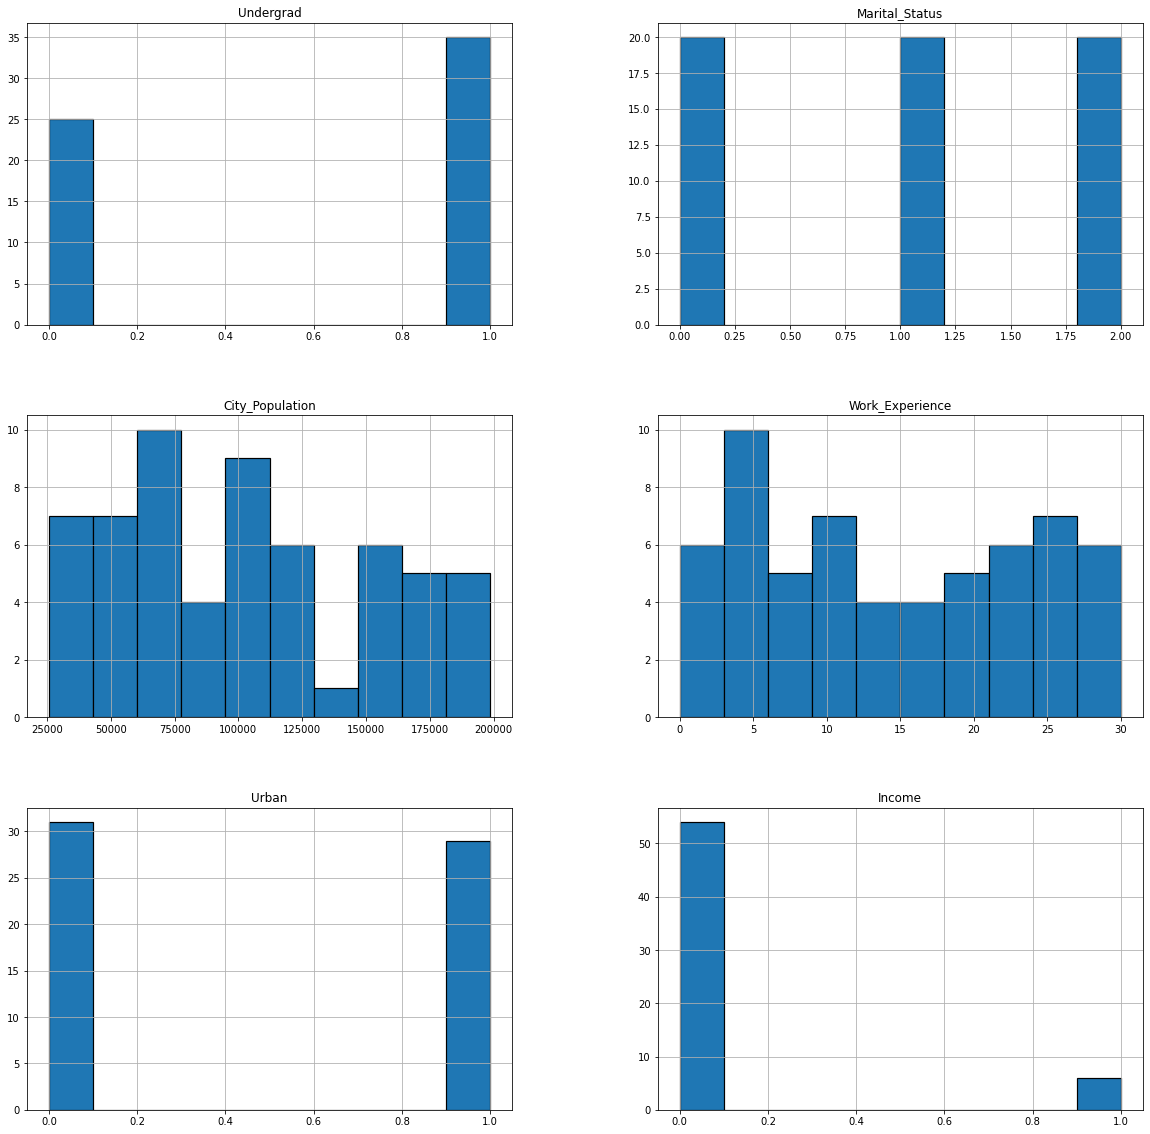

In [17]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

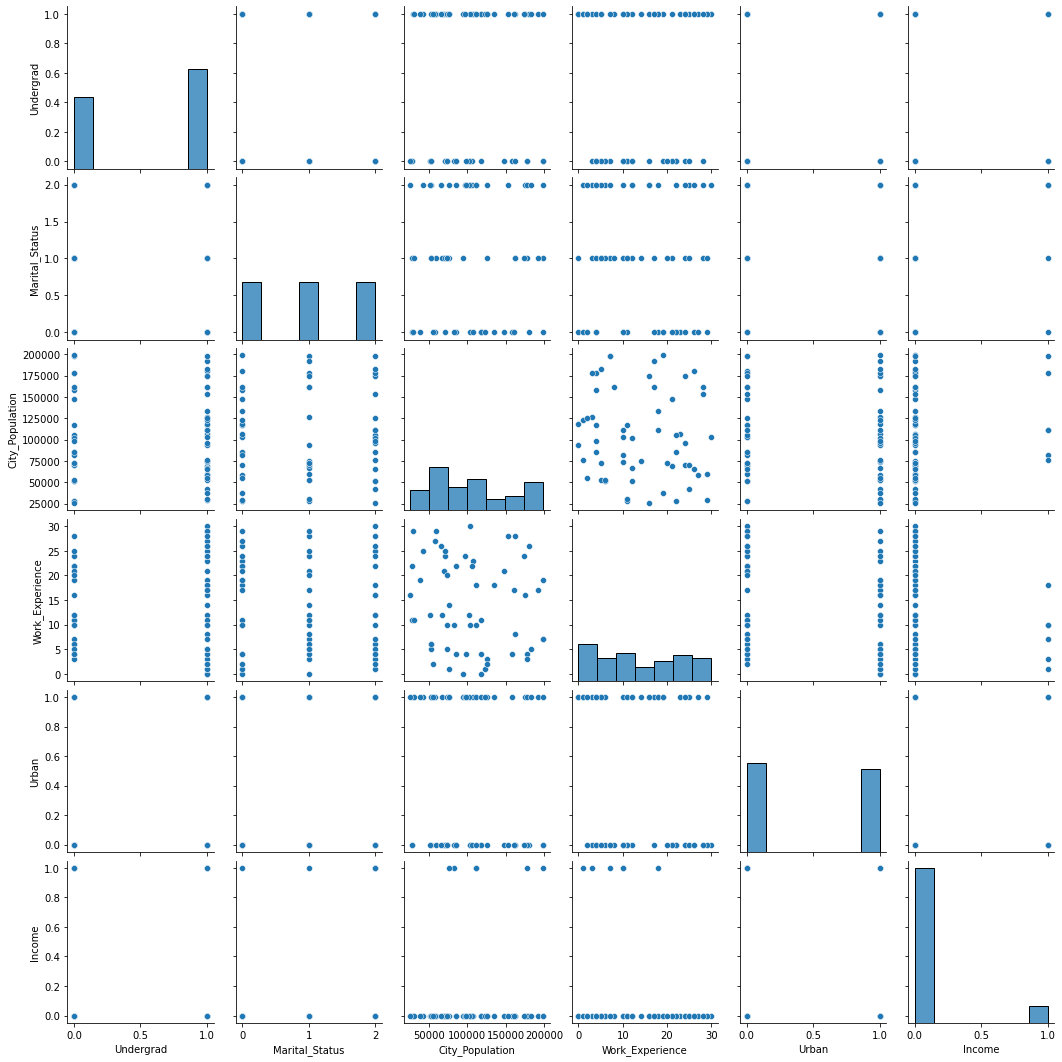

In [18]:
#pairplot
sns.pairplot(data)

<AxesSubplot:>

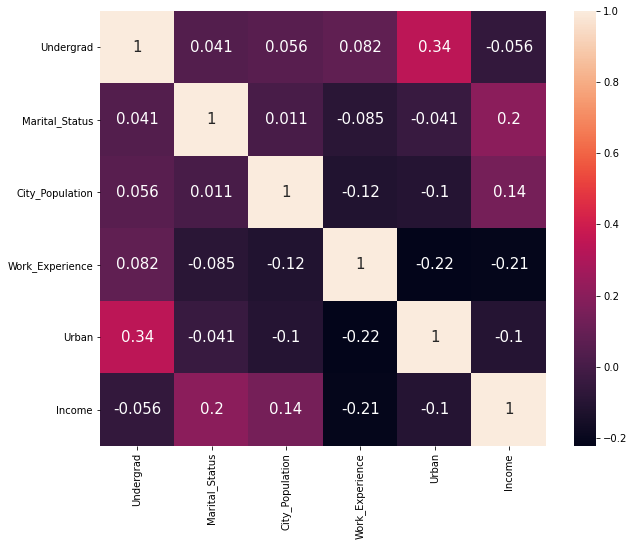

In [19]:
#heat map for corelation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True, annot_kws={"size":15})

#### Let’s separate the Fraudulent cases from the authentic ones and compare their occurrences in the dataset.

In [20]:
Fraud = data[data['Income'] == 1]
Valid = data[data['Income'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Income'] == 1])))
print('Valid cases: {}'.format(len(data[data['Income'] == 0])))

0.1111111111111111
Fraud Cases: 6
Valid cases: 54


### There is only 0.1% fraudulent cases out all the cases.

In [21]:
print("Work_exp Details in fradulent cases")
data.Work_Experience.describe()

Work_exp Details in fradulent cases


count    60.000000
mean     14.000000
std       9.187316
min       0.000000
25%       5.000000
50%      12.000000
75%      22.000000
max      30.000000
Name: Work_Experience, dtype: float64

## let’s proceed with dividing the data values

In [22]:
x= data.iloc[:,0:5]
y= data.iloc[:,5]

In [23]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

### Building the Isolation Forest Model

In [24]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [25]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)
y_pred

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1])

In [26]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()
n_errors

3

##### Evaluate the Model and print the results. We will be calculating the Accuracy, Precision, Recall, F1-Score and the Matthews correlation coefficient for the sake of totality.

In [29]:
#printing every score of the classifier
#scoring in any thing

from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

the Model used is Isolation Forest
The accuracy is  0.75
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### Visualizing the Confusion Matrix for this model.

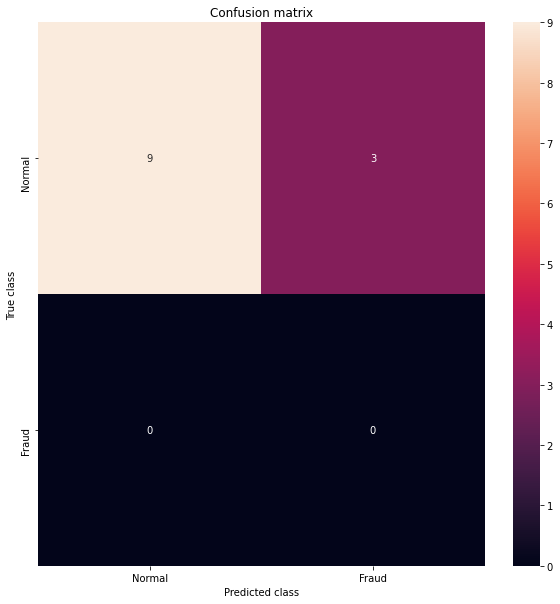

In [32]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [33]:
# Run classification metrics

print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Isolation Forest: 3
0.75
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.00      0.00      0.00         0

    accuracy                           0.75        12
   macro avg       0.50      0.38      0.43        12
weighted avg       1.00      0.75      0.86        12



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building the Random Forest Model

Random Forest Classifier

In [34]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

## Building an Evaluation matrix on test set

In [35]:
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is  1.0
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1510: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:896: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


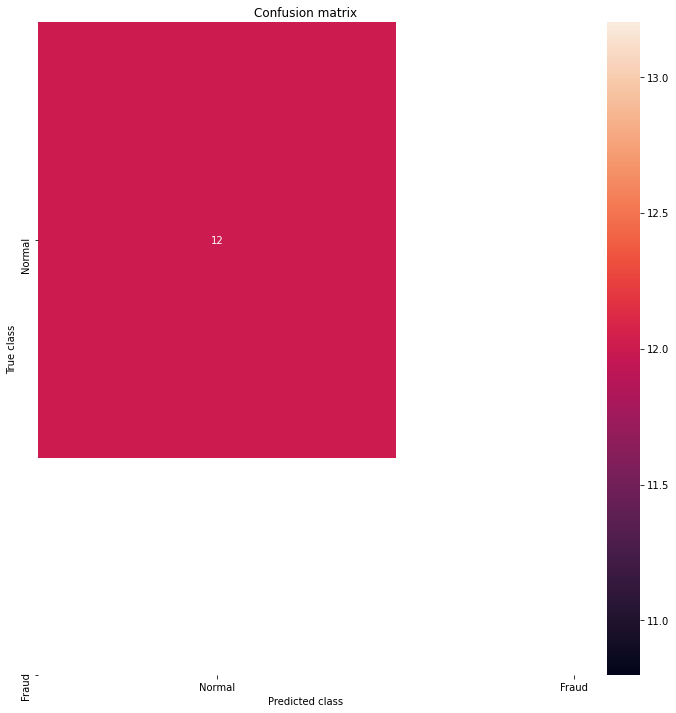

In [36]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [37]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Random Forest: 0
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



<Figure size 648x504 with 0 Axes>